# Evaluation

## General Plot settings

In [1]:
dir_to_save_plots = '../report/figures/'

## Machine specs
The evaluation was performed on a machine with the following specs:
- 12th Gen Intel(R) Core(TM) i7-1255U 1.70 GHz
- 16 GB of RAM
- Windows 11

The evaluation of MAFIA was performed using GPUMAFIA, which was installed on a virtual machine using VirtualBox. The virtual machine was configured with 4 CPUs and 4 GB of RAM. The operating system was Ubuntu 24.04.1 LTS.

CLIQUE and SUBCLU were evaluated on the host machine using ELKI.

## Data set size vs. runtime

- Tested on a 20-dimensional data set containing 5 clusters in 5 different subspaces.
- 10% of the data was added as noise records.
- CLIQUE stopped working after 7mio records and SUBCLU stopped working after 200,000 records. MAFIA was able to handle at least 15mio records.

### Settings

CLIQUE:
- xsi: 25
- tau: 0.08

SUBCLU:
- epsilon 0.02
- minpts: 250 (for 10k points). Doubled for each step, so 500 minpts for 20k, 1000 minpts for 40k, etc.

MAFIA:
- -a 1.4
- -b 0.35
- -M 20
- -n 1000
- -V
- --timing

### Plot

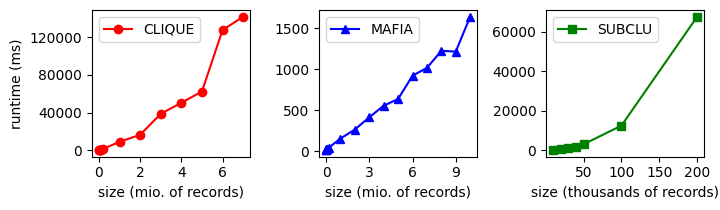

In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Data
size =   [10000, 20000, 30000, 40000, 50000, 100000, 200000, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000, 10000000, 15000000]
clique = [62   , 119  , 155  , 203  , 235  , 533   , 1255  , 8795   , 16290  , 38581  , 50392  , 62348  , 127730 , 142005]
mafia =  [15   , 25   , 17   , 22   , 27   , 31    , 45    , 155    , 265    , 414    , 556    , 637    , 922    , 1016   , 1225   , 1215   , 1641]
subclu = [137  , 477  , 984  , 1751 , 3055 , 12490 , 67603]

# Figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(7.3, 2.2))

# CLIQUE (size in millions)
axs[0].plot([s / 1_000_000 for s in size[:len(clique)]], clique, 'ro-', label='CLIQUE')
axs[0].set_xlabel('size (mio. of records)')
axs[0].set_ylabel('runtime (ms)')
axs[0].xaxis.set_major_locator(ticker.MaxNLocator(5))
axs[0].yaxis.set_major_locator(ticker.MaxNLocator(5))
axs[0].legend()

# MAFIA (size in millions)
axs[1].plot([s / 1_000_000 for s in size[:len(mafia)]], mafia, 'b^-', label='MAFIA')
axs[1].set_xlabel('size (mio. of records)')
axs[1].xaxis.set_major_locator(ticker.MaxNLocator(4))
axs[1].yaxis.set_major_locator(ticker.MaxNLocator(4))
axs[1].legend()

# SUBCLU (size in thousands)
axs[2].plot([s / 1000 for s in size[:len(subclu)]], subclu, 'gs-', label='SUBCLU')
axs[2].set_xlabel('size (thousands of records)')
axs[2].xaxis.set_major_locator(ticker.MaxNLocator(5))
axs[2].yaxis.set_major_locator(ticker.MaxNLocator(4))

axs[2].legend()

# Tight layout
plt.tight_layout()

# Save plot
plt.savefig(dir_to_save_plots + 'dataset_size_vs_runtime.png')

# Show plot
plt.show()

Both CLIQUE and MAFIA scales linearly with the number of records. SUBCLU seems to grow more exponentially, which also explains why it stopped working after 200,000 records.

## Accuracy

- Tested on a 10-dimensional data set containing 100,000 points for testing CLIQUE and MAFIA, however, SUBCLU was not able to handle this amount of data, so it was tested on a similar distribution of points with 20,000 points.
- 10% of the data was added as noise records.
- First case, has two clusters embedded in a different 4 dimensional subspace. Second case, has 4 clusters embedded in a different 4 dimensional subspace.

### Plus shape

#### Settings
CLIQUE:
- xsi: 10
- tau: 0.16

MAFIA:
- -a 0.08
- -b 0.3
- -M 20
- -n 1000
- -p
- -V
- --timing

#### Plot

![plus-shape](datasets\home-made\accuracy\plus_shape\composed_results\plot.png "Plus shape")

### 2 clusters

- 10 dimensions
- 2 clusters embedded in a different 4 dimensional subspace
- 10% noise

#### Settings

SUBCLU:
- epsilon: 0.05
- minpts: 850

CLIQUE:
- xsi: 20
- tau: 0.41
- prune: false

MAFIA:
- -a 3
- -b 0.6
- -M 20
- -n 1000
- -V
- -p
- --timing

#### Plot

| CLIQUE | MAFIA | SUBCLU |
|--|--|--|
| ![clique](datasets/mdcgen/accuracy/2clusters/100k/clique/3d_plot.png "CLIQUE") | ![MAFIA](datasets/mdcgen/accuracy/2clusters/100k/mafia/3d_plot.png) | ![SUBCLU](datasets/mdcgen/accuracy/2clusters/20k/subclu/3d_plot.png) |

MAFIA reports the correct clusters in both cases and detects the noise points.

CLIQUE also reports the two clusters, however, it also finds some noise points as clusters.

SUBCLU reports the correct clusters, but it also finds a lot extra incorrectly clusters.

### 4 clusters

- 10 dimensions
- 4 clusters
- 10% noise

#### Settings

SUBCLU:
- epsilon: 0.02
- minpts: 500

CLIQUE:
- xsi: 35
- tau: 0.2

MAFIA:
- -a 3
- -b 0.6
- -M 100
- -n 1000
- -V
- -p
- --timing

#### Plot

| CLIQUE | MAFIA | SUBCLU |
|--|--|--|
| ![clique](datasets/mdcgen/accuracy/4clusters/100k/clique/3d_plot.png "CLIQUE") | ![MAFIA](datasets/mdcgen/accuracy/4clusters/100k/mafia/3d_plot.png) | ![SUBCLU](datasets/mdcgen/accuracy/4clusters/20k/subclu/3d_plot.png) |

Again, MAFIA reports the correct clusters in both cases and detects the noise points.

CLIQUE fails to detect one of the clusters.

SUBCLU fails completly to detect the clusters.

### Bezier curve

- 2 dimensions
- 1 clusters
- 10% noise

#### Settings
CLIQUE:
- xsi: 20
- tau: 0.025

MAFIA:
- -b 0.35
- -M 40
- -a 0.15
- -n 1000
- -p
- -V
- --timing

SUBCLU:
- epsilon: 0.2
- minpts: 76
- mindim: 2

DBSCAN:
- epsilon: 0.04
- minpts: 100

#### Plot

| CLIQUE | MAFIA | SUBCLU |
|--|--|--|
| ![clique](datasets/artificalCluster/accuracy/bezier/clique/plot.png "CLIQUE") | ![MAFIA](datasets/artificalCluster/accuracy/bezier/mafia/plot.png) | ![SUBCLU](datasets/artificalCluster/accuracy/bezier/subclu/plot.png) |

Even though one might expect SUBCLU to produce the same results as DBSCAN when run on a 2D dataset with mindim=2, the results will differ. This is because SUBCLU always uses a bottom-up approach to explore subspaces. It first examines 1D subspaces before moving on to higher-dimensional ones. When mindim is set to 2, SUBCLU disregards clusters that exist in subspaces with dimensionality less than 2. As a result, even though both algorithms are set to work in the full 2D space, the subspace exploration process and the focus on dimensionality lead SUBCLU to produce different clustering results than DBSCAN.

## Cluster dimensionality vs. runtime

- Tested on a 30-dimensional data set containing 500,000 points.
- 10% of the data was added as noise records.
- The data set contains a _single_ cluster embedded in increasing dimensional subspaces.

### Settings

CLIQUE:
- xsi: 30
- tau: 0.25

MAFIA:
- -a 2.2
- -b 0.35
- -M 40
- -n 1000
- -p
- -V
- --timing

### Plot

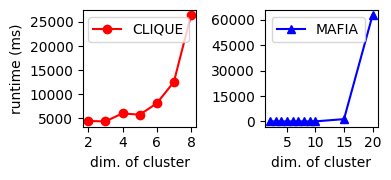

In [3]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Data
dims =   [2   , 3   , 4   , 5   , 6   , 7    , 8    , 9 , 10, 15 , 20]
mafia =  [45  , 63  , 55  , 45  , 63  , 55   , 60   , 79, 86, 1387, 62607]
clique = [4440, 4347, 6017, 5740, 8093, 12532, 26373]

# Figure with 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(4, 1.9))

# CLIQUE
axs[0].plot(dims[:len(clique)], clique, 'ro-', label='CLIQUE')
axs[0].set_xlabel('dim. of cluster')
axs[0].set_ylabel('runtime (ms)')
axs[0].xaxis.set_major_locator(ticker.MaxNLocator(4))
axs[0].yaxis.set_major_locator(ticker.MaxNLocator(5))
axs[0].legend()

# MAFIA
axs[1].plot(dims, mafia, 'b^-', label='MAFIA')
axs[1].set_xlabel('dim. of cluster')
axs[1].xaxis.set_major_locator(ticker.MaxNLocator(4))
axs[1].yaxis.set_major_locator(ticker.MaxNLocator(5))
axs[1].legend()

# Tight layout
plt.tight_layout()

# Save plot
plt.savefig(dir_to_save_plots + 'cluster_dimensionality_vs_runtime.png')

# Show plot
plt.show()

MAFIA uses almost no time to find the clusters compared to CLIQUE of the cluster dimensions is not higher than 16. After that, the time seems to increase exponentially.

## Data dimensionality vs. runtime

- Tested on a 1,000,000 points data set with 3 clusters.
- 10% of the data was added as noise records.
- The data dimensionality was increased from 10 to 100.

### Settings

CLIQUE:
- xsi: 30
- tau: 0.3
- prune: false

MAFIA:
- -a 2.2
- -b 0.35
- -M 40
- -n 1000
- -V
- --timing

### Plot

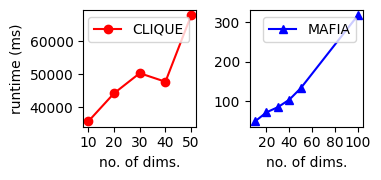

In [4]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Data
dims =   [10   , 20   , 30   , 40   , 50 , 100]
mafia_runtime =  [49   , 72   , 85   , 104  , 133, 317]
clique_runtime = [35688, 44180, 50275, 47682, 67772]

# CLIQUE:
# 10d = 66 clusters found
# 20d = 84
# 30d = 93
# 40d = 77
# 50d = 93
# 100d, not able to run.

# MAFIA:
# 10d  = 3 clusters found
# 20d  = 4 clusters found
# 30d  = 3 clusters found
# 40d  = 4 clusters found
# 50d  = 3 clusters found
# 100d = 4 clusters found

# Figure with 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(3.9, 1.9))

# CLIQUE
axs[0].plot(dims[:len(clique_runtime)], clique_runtime, 'ro-', label='CLIQUE')
axs[0].legend()
axs[0].xaxis.set_major_locator(ticker.MaxNLocator(5))
axs[0].set_xlabel('no. of dims.')
axs[0].set_ylabel('runtime (ms)')

# MAFIA
axs[1].plot(dims, mafia_runtime, 'b^-', label='MAFIA')
axs[1].legend()
axs[1].xaxis.set_major_locator(ticker.MaxNLocator(5))
axs[1].set_xlabel('no. of dims.')

# Tight layout
plt.tight_layout()

# Save plot
fig.savefig(dir_to_save_plots + 'data_dimensionality_vs_runtime.png')

# Show plot
plt.show()

Both CLIQUE and MAFIA seems to scale linearly with the number of dimensions in the dataset.

## Sensitivity of alpha
- 1,000,000 data points
- 20 dims
- 5 clusters
- 10% outliers

### Settings
- -b 0.35
- -M 40
- -n 1000
- -V
- -a 0.8 -> 5.2 (step size: 0.4)

### Plot

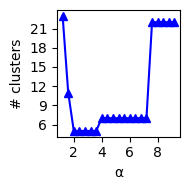

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Data
alpha = np.arange(1.2, 9.6, 0.4)
clusters_found = [23, 11, 5, 5, 5, 5, 5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 22, 22, 22, 22, 22]

# Figure size
plt.figure(figsize=(2, 2))

# Plot
plt.plot(alpha, clusters_found, 'b^-')

# Set number of x- and y-ticks
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(5))
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(7))

# Add labels
plt.xlabel('α')
plt.ylabel('# clusters')

# Tight layout
plt.tight_layout()

# Save plot
plt.savefig(dir_to_save_plots + 'sensitivity_alpha.png')

# Show plot
plt.show()

MAFIA sensitivity to alpha is not that high as observed in article. The number of clusters found is almost the same if alpha is somewhere between 2 and 7. After that, the number of clusters starts to increase.

## Real-world data set

### Iris

#### Settings
- CLIQUE: xsi: 20, tau: 0.1
- Subclu: epsilon: 0.05, minpts: 210
- MAFIA: -M 20 -a 1.4 -b 0.2 -p -V --timing

#### Plot

| Original | CLIQUE |
|--|--|
| ![original](datasets/real-world/iris/plot.png "Original") | ![clique](datasets/real-world/iris/clique/plot.png "CLIQUE") |
| MAFIA | SUBCLU |
| ![MAFIA](datasets/real-world/iris/mafia/plot.png) | ![SUBCLU](datasets/real-world/iris/subclu/plot.png) |

### Date-fruit

#### Settings
SUBCLU:
- epsilon: 0.05
- minpts: 210

CLIQUE and MAFIA wasn't able to produce meaningful clusters.

#### Plot

| Original | SUBCLU |
|--|--|
| ![original](datasets/real-world/date-fruit/plot.png "Original") | ![subclu](datasets/real-world/date-fruit/subclu/plot.png "SUBCLU") |

# Figures to Report

Total number of points: 30


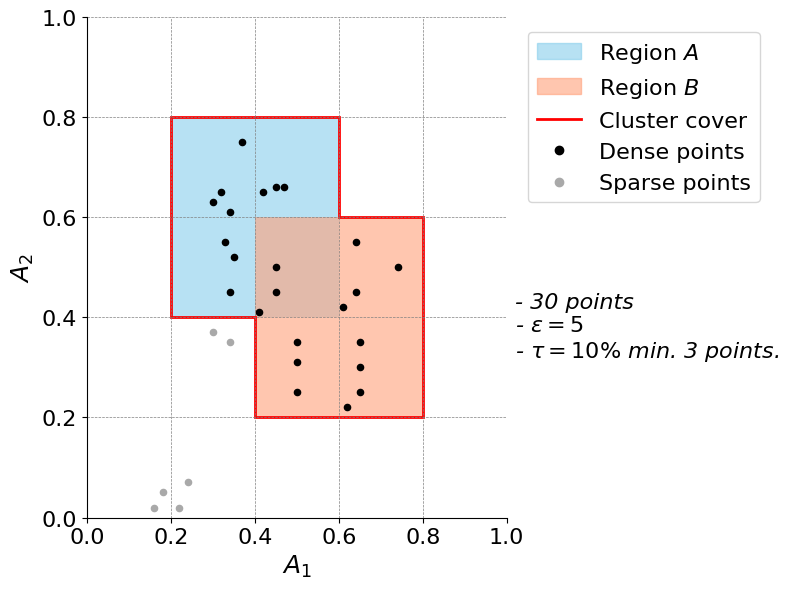

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Define grid size and bin edges with a width of 0.2 from 0 to 1
grid_size = 0.2
bins = np.arange(0, 1.0 + grid_size, grid_size)

# Define dense cells as a list of (x, y) grid coordinates
dense_cells = [(0.2, 0.4), (0.2, 0.6),
               (0.4, 0.4), (0.4, 0.6),
               (0.4, 0.2), (0.4, 0.4),
               (0.6, 0.2), (0.6, 0.4)]

# Define regions
region_A = ((0.2, 0.4), 0.4)
region_B = ((0.4, 0.2), 0.4)

# Manually define dense- and sparse points in each cell
points = {
    (0.2, 0.4): {'coords': [(0.34, 0.45), (0.35, 0.52), (0.33, 0.55)], 'type': 'dense'},
    (0.2, 0.6): {'coords': [(0.34, 0.61), (0.32, 0.65), (0.37, 0.75), (0.3, 0.63)], 'type': 'dense'},
    (0.4, 0.4): {'coords': [(0.41, 0.41), (0.43, 0.44), (0.42, 0.46)], 'type': 'dense'},
    (0.4, 0.6): {'coords': [(0.42, 0.65), (0.45, 0.66), (0.47, 0.66)], 'type': 'dense'},
    (0.4, 0.2): {'coords': [(0.5, 0.31), (0.5, 0.35), (0.5, 0.25)], 'type': 'dense'},
    (0.4, 0.4): {'coords': [(0.41, 0.41), (0.45, 0.45), (0.45, 0.50)], 'type': 'dense'},
    (0.6, 0.2): {'coords': [(0.62, 0.22), (0.65, 0.25), (0.65, 0.30), (0.65, 0.35)], 'type': 'dense'},
    (0.6, 0.4): {'coords': [(0.61, 0.42), (0.64, 0.45), (0.64, 0.55), (0.74, 0.5)], 'type': 'dense'},
}
sparse_cells = {
    (0.0, 0.0): {'coords': [(0.16, 0.02), (0.18, 0.05)], 'type': 'sparse'},
    (0.2, 0.0): {'coords': [(0.22, 0.02), (0.24, 0.07)], 'type': 'sparse'},
    (0.2, 0.2): {'coords': [(0.3, 0.37), (0.34, 0.35)], 'type': 'sparse'}
}

# Combine dense and sparse points into one dictionary
points.update(sparse_cells)
total_points = sum([len(cell_points['coords']) for cell_points in points.values()])
print("Total number of points:", total_points)

# Create the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Draw the grid
for x in np.arange(0, 1.0 + grid_size, grid_size):
    ax.axvline(x, color='gray', linestyle='--', linewidth=0.5)
for y in np.arange(0, 1.0 + grid_size, grid_size):
    ax.axhline(y, color='gray', linestyle='--', linewidth=0.5)

# Highlight Regions
region_A_rect = patches.Rectangle(region_A[0], region_A[1], region_A[1], facecolor='skyblue', alpha=0.6)
ax.add_patch(region_A_rect)
region_B_rect = patches.Rectangle(region_B[0], region_B[1], region_B[1], facecolor='lightsalmon', alpha=0.6)
ax.add_patch(region_B_rect)

# Draw a single red polygonal line around both regions
polygon_coords = [[0.2, 0.4], [0.2, 0.8], [0.6, 0.8], [0.6, 0.6], [0.8, 0.6], [0.8, 0.2], [0.4, 0.2], [0.4, 0.4]]
polygon = patches.Polygon(polygon_coords, closed=True, edgecolor='red', linewidth=2, fill=False)
ax.add_patch(polygon)

# Plot points in dense- and sparse cells
for cell, cell_data in points.items():
    x_vals, y_vals = zip(*cell_data['coords'])
    color = 'black' if cell_data['type'] == 'dense' else 'darkgray'
    ax.scatter(x_vals, y_vals, color=color, s=20)

# Set labels and limits
ax.set_xlim(0, 1.0)
ax.set_ylim(0, 1.0)
ax.set_xlabel('$A_1$', fontsize=18)
ax.set_ylabel('$A_2$', fontsize=18)

# Set ticks font size
ax.tick_params(axis='both', which='major', labelsize=16)

# Remove top and right borders of the plot to create an "open" effect
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Create a legend outside the plot
handles = [patches.Patch(color='skyblue', alpha=0.6, label='Region $A$'),
           patches.Patch(color='lightsalmon', alpha=0.6, label='Region $B$'),
           plt.Line2D([0], [0], color='red', lw=2, linestyle='-', label='Cluster cover'),
           plt.Line2D([0], [0], color='black', lw=1.5, marker='o', linestyle='', label='Dense points'),
           plt.Line2D([0], [0], color='darkgray', lw=1.5, marker='o', linestyle='', label='Sparse points')]

legend = ax.legend(handles=handles, loc='center left', bbox_to_anchor=(1.05, 0.8), fontsize=16, borderaxespad=0.)

# Adjust the layout to accommodate the legend
plt.subplots_adjust(right=0.7)

# Add tau value as a threshold label
density_threshold_percentage = 10
tau_value = r'$\tau = {}\%$'.format(density_threshold_percentage)
epsilon_value = r'$\varepsilon = 5$'
ax.text(1.02, 0.45, f'- {total_points} points\n- {epsilon_value}\n- {tau_value} min. 3 points.', 
        transform=ax.transAxes, fontsize=16, fontstyle='italic', va='top')

# Tight layout
plt.tight_layout()

# Save plot
plt.savefig(dir_to_save_plots + 'dense_cells_and_regions.png')

# Show plot
plt.show()

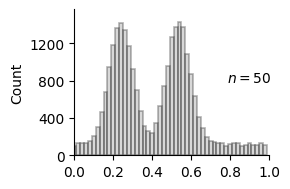

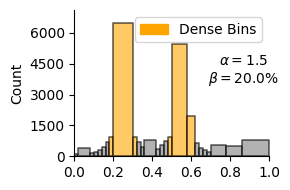

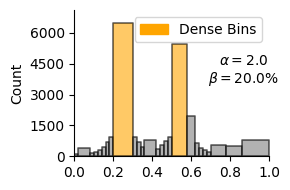

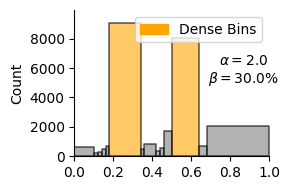

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker

# Definitions
n_clusters = 2
points_per_cluster = 10000
noise_percentage = 0.3  # to ensure there exists points in most of the bins
seed = 33

# Set seed
np.random.seed(seed)

# Define grid size and bin edges with a small window size
grid_size = 0.02  # corresponds to 1000 bins
bins = np.arange(0, 1.0 + grid_size, grid_size)

# Example histogram data (random values for demonstration)
def generate_clusters(n_clusters, points_per_cluster):
    data = []
    for _ in range(n_clusters):
        center = np.random.rand()  # Random center for the cluster
        cluster_data = np.random.normal(loc=center, scale=0.06, size=points_per_cluster)
        data.extend(cluster_data)
    return np.array(data)

# Generate clustered data
clustered_data = generate_clusters(n_clusters, points_per_cluster)

# Clip clustered data to be within [0, 1]
clustered_data = clustered_data[(clustered_data >= 0) & (clustered_data <= 1)]

# Calculate noise points
n_noise_points = int(noise_percentage * len(clustered_data))

# Generate noise uniformly across the range [0, 1]
noise_data = np.random.uniform(0, 1, n_noise_points)

# Combine clustered data and noise
hist_data = np.concatenate([clustered_data, noise_data])
hist_counts, _ = np.histogram(hist_data, bins=bins)

# Calculate the total number of data points (N)
N = len(hist_data)

# Calculate the size of the dimension (D_i)
D_i = bins[-1] - bins[0]  # Assuming the dimension size is the range of the bins

# Plot original uncombined histogram
def plot_original_histogram():
    fig, ax = plt.subplots(figsize=(3, 2))
    ax.bar(bins[:-1], hist_counts, width=grid_size, color='gray', alpha=0.3, edgecolor='black', linewidth=1.2)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, max(hist_counts) * 1.1)
    ax.set_ylabel('Count')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # Set number of x and y ticks
    ax.xaxis.set_major_locator(ticker.MaxNLocator(5))
    ax.yaxis.set_major_locator(ticker.MaxNLocator(5))

    ax.text(0.9, 0.5, r'$n = {}$'.format(int(np.floor(1/grid_size))), fontsize=10, transform=ax.transAxes, ha='center')
    
    plt.tight_layout()
    plt.savefig(dir_to_save_plots + 'adaptive_grids/before_adaptive.png')
    plt.show()

# Plot multiple histograms for different values of alpha and beta
def plot_combined_histograms(alpha_values, beta_values):
    for alpha, beta_percentage in zip(alpha_values, beta_values):
        # Combine bins based on the percentage difference threshold beta
        small_count_threshold = 0
        combined_bins = []
        current_bin = [(bins[0], bins[1])]
        current_sum = hist_counts[0]
        previous_count = hist_counts[0]  # Keep track of the previous bin's count

        for i in range(1, len(hist_counts)):
            current_count = hist_counts[i]

            # Calculate the percentage difference between the current bin and the previous bin count
            if previous_count > 0:  # To avoid division by zero
                percentage_difference = abs(current_count - previous_count) / previous_count
            else:
                percentage_difference = float('inf')  # If the previous count is zero, set the difference to infinity

            # Merge bins if they have a percentage difference within the threshold or if both have small counts
            if percentage_difference <= beta_percentage or (previous_count <= small_count_threshold and current_count <= small_count_threshold):
                current_sum += current_count
                current_bin.append((bins[i], bins[i + 1]))
            else:
                # If not, finalize the current bin group and start a new one
                combined_bins.append((current_bin, current_sum))
                current_bin = [(bins[i], bins[i + 1])]
                current_sum = current_count

            # Update the previous count for the next iteration
            previous_count = current_count

        # If there's any leftover bin that hasn't been added, add it as well
        if current_bin:
            combined_bins.append((current_bin, current_sum))

        # Plot the combined histogram (after adaptive algorithm)
        fig, ax = plt.subplots(figsize=(3, 2))

        # Draw the combined bins manually and color dense bins orange
        for combined_bin, total_count in combined_bins:
            bin_start = combined_bin[0][0]
            bin_end = combined_bin[-1][1]
            bin_size = bin_end - bin_start
            threshold = alpha * (bin_size * N) / D_i

            # Determine if the bin is dense
            is_dense = total_count >= threshold
            color = 'orange' if is_dense else 'gray'

            # Draw the bar for the combined bin
            ax.fill_between([bin_start, bin_end], 0, total_count, color=color, alpha=0.6, edgecolor='black', linewidth=1.2)

        ax.set_xlim(0, 1)
        ax.set_ylim(0, max([count for _, count in combined_bins]) * 1.1)
        ax.set_ylabel('Count')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        # Set number of x and y ticks
        ax.xaxis.set_major_locator(ticker.MaxNLocator(5))
        ax.yaxis.set_major_locator(ticker.MaxNLocator(5))

        # Add beta and alpha values as text
        alpha_text = r'$\alpha = {}$'.format(alpha)
        beta_text = r'$\beta = {}\%$'.format(beta_percentage * 100)
        ax.text(0.87, 0.5, f'{alpha_text}\n{beta_text}', fontsize=10, transform=ax.transAxes, ha='center')

        # Add a legend for dense bins
        ax.legend(handles=[mpatches.Patch(color='orange', label='Dense Bins')], loc='upper right')

        plt.tight_layout()
        plt.savefig(dir_to_save_plots + f'adaptive_grids/after_adaptive_alpha_{alpha}_beta_{beta_percentage}.png')
        plt.show()

# Plot the original histogram
plot_original_histogram()

# Define multiple alpha and beta values for comparison
alpha_values = [1.5, 2.0, 2.0]
beta_values = [0.2, 0.2, 0.3]

# Call the function to generate combined histograms
plot_combined_histograms(alpha_values, beta_values)


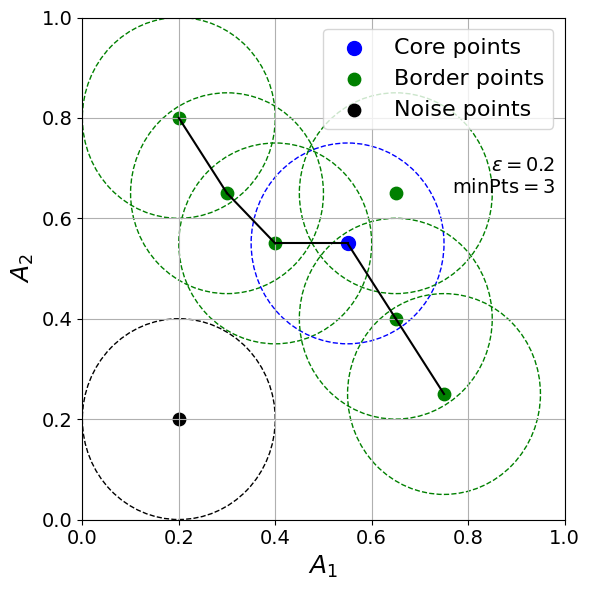

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Manually define points
points = np.array([
    [0.2, 0.2],  # 0 noise
    [0.2, 0.8], # 1 border
    [0.3, 0.65], # 2 border
    [0.4, 0.55], # 3 core
    [0.55, 0.55], # 4 border
    [0.65, 0.65],   # 5 border
    [0.65, 0.4],  # 6 border
    [0.75, 0.25], # 7 border
])

# Define point
core_points = [4]
border_points = [1, 2, 3, 5, 6, 7]
noise_points = [0]

# Define epsilon (radius) for visual purposes
epsilon = 0.2

# Define manually where arrows (connections) should go
arrows = [
    (1, 2),  # Core to Core
    (2, 3),  # Core to Core
    (3, 4),  # Core to Border
    (4, 6),  # Core to Border
    (6, 7),  # Border to Border
]

# Plotting
fig, ax = plt.subplots(figsize=(6, 6))

# Plot core points
core = points[core_points]
ax.scatter(core[:, 0], core[:, 1], color='blue', label='Core points', s=100)

# Plot border points
border = points[border_points]
ax.scatter(border[:, 0], border[:, 1], color='green', label='Border points', s=80)

# Plot noise points
noise = points[noise_points]
ax.scatter(noise[:, 0], noise[:, 1], color='black', label='Noise points', s=80)

# Draw radius around each point (including core, border, and noise points)
for i in range(len(points)):
    # Different color depending on the point type
    if i in core_points:
        color = 'blue'
    elif i in border_points:
        color = 'green'
    else:
        color = 'black'
    circle = plt.Circle((points[i, 0], points[i, 1]), epsilon, color=color, fill=False, linestyle='--', linewidth=1)
    ax.add_patch(circle)

# Draw manually defined arrows
for arrow in arrows:
    start, end = arrow
    ax.plot([points[start, 0], points[end, 0]], [points[start, 1], points[end, 1]], color='black', linestyle='-', linewidth=1.5)

# Set labels, legend, and title
ax.set_xlabel('$A_1$', fontsize=18)
ax.set_ylabel('$A_2$', fontsize=18)
ax.legend(loc='upper right', fontsize=16)

# Add epsilon and minPts values as text
epsilon_text = r'$\varepsilon = {}$'.format(epsilon)
minPts_text = r'$\text{minPts} = 3$'
ax.text(0.98, 0.65, f'{epsilon_text}\n{minPts_text}', fontsize = 14, transform=ax.transAxes, ha='right')

# Adjust plot limits
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

# Set ticks font size
ax.tick_params(axis='both', which='major', labelsize=14)

# Layout
plt.grid(True)
plt.tight_layout()

# Save plot
plt.savefig(dir_to_save_plots + 'subclu.png')

# Show plot
plt.show()